In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In C:\Users\souvi\anaconda3\envs\tsa_course\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\souvi\anaconda3\envs\tsa_course\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\souvi\anaconda3\envs\tsa_course\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from fbprophet import Prophet

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


In [4]:
df = pd.read_csv('confirmed.csv')
df = df.drop('Unnamed: 0', axis=1)

In [5]:
df.head()

,Date,India
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0


In [6]:
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds'])

In [7]:
df.head()

,ds,y
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0


In [8]:
len(df)

136

In [15]:
m = Prophet(weekly_seasonality=False)
m.fit(df)
future = m.make_future_dataframe(periods=12, freq='D')
forecast = m.predict(future)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [16]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
143,2020-06-13,264270.666003,258600.106517,269946.940534,262549.983023,266130.078683,0.0,0.0,0.0,0.0,0.0,0.0,264270.666003
144,2020-06-14,270201.491998,264432.095141,276177.807453,268020.740808,272384.463635,0.0,0.0,0.0,0.0,0.0,0.0,270201.491998
145,2020-06-15,276132.317994,269986.379359,281796.601202,273575.391818,278689.033429,0.0,0.0,0.0,0.0,0.0,0.0,276132.317994
146,2020-06-16,282063.143990,275859.601305,288270.376729,279043.684307,285003.843736,0.0,0.0,0.0,0.0,0.0,0.0,282063.143990
147,2020-06-17,287993.969986,281418.294044,295124.636133,284548.478081,291386.672020,0.0,0.0,0.0,0.0,0.0,0.0,287993.969986


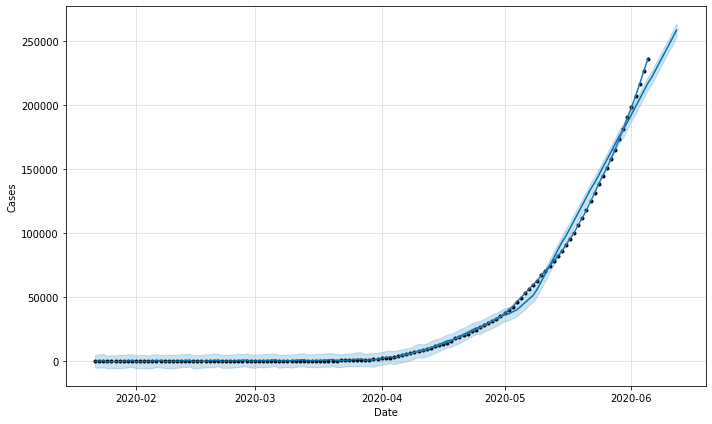

In [13]:
m.plot(forecast, xlabel = 'Date', ylabel = 'Cases');
plt.plot(test['ds'], test['y'])

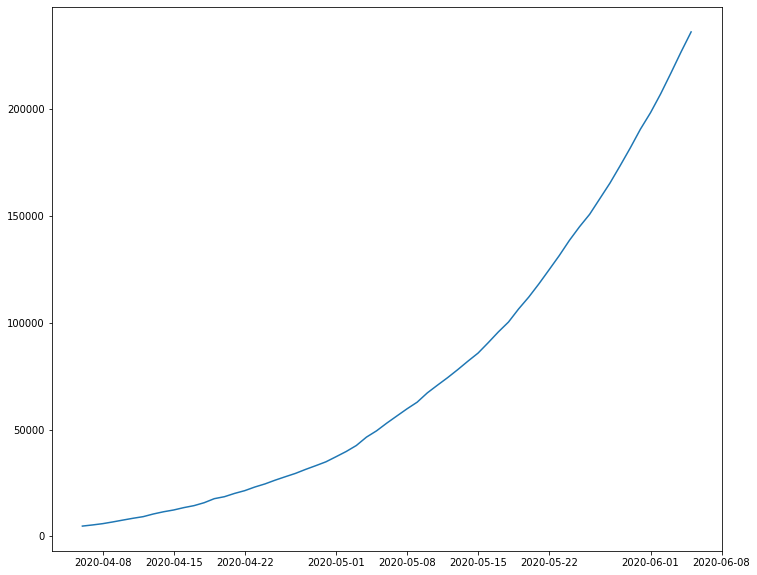

In [14]:
plt.figure(figsize=(12, 10))
plt.plot(test['ds'], test['y'])